In [6]:
from unet import UNet
from utils.config import load_config
from theoretical_receptive_field import plot_rf_sizes, compute_trf
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [7]:
cfg_default = load_config("default")
model = UNet(cfg_default)
rf = model.output_trfs()

### (Max) TRF size of each layer

In [8]:
_ = compute_trf(model, 576, print_output=True)

-----------------------------------------------
layer  type             max_trf_size skip conn.
    0  input layer                 1           

EncoderBlock
    1  Conv2d                      3           
    2  BatchNorm2d                 3           
    3  ReLU                        3           
    4  Conv2d                      5           
    5  BatchNorm2d                 5           
    6  ReLU                        5      1 OUT
    7  MaxPool2d                   6           

EncoderBlock
    8  Conv2d                     10           
    9  BatchNorm2d                10           
   10  ReLU                       10           
   11  Conv2d                     14           
   12  BatchNorm2d                14           
   13  ReLU                       14      2 OUT
   14  MaxPool2d                  16           

EncoderBlock
   15  Conv2d                     24           
   16  BatchNorm2d                24           
   17  ReLU                       24          

### Heatmap of TRF size for each pixel in the image
Value is the square root of the area of the pixel's TRF.

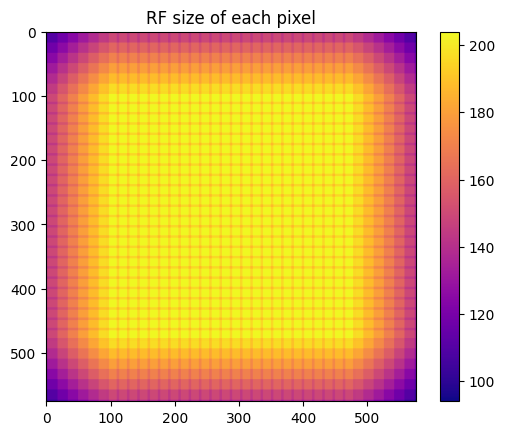

In [9]:
plot_rf_sizes(rf)

### Some TRFs of specific pixels

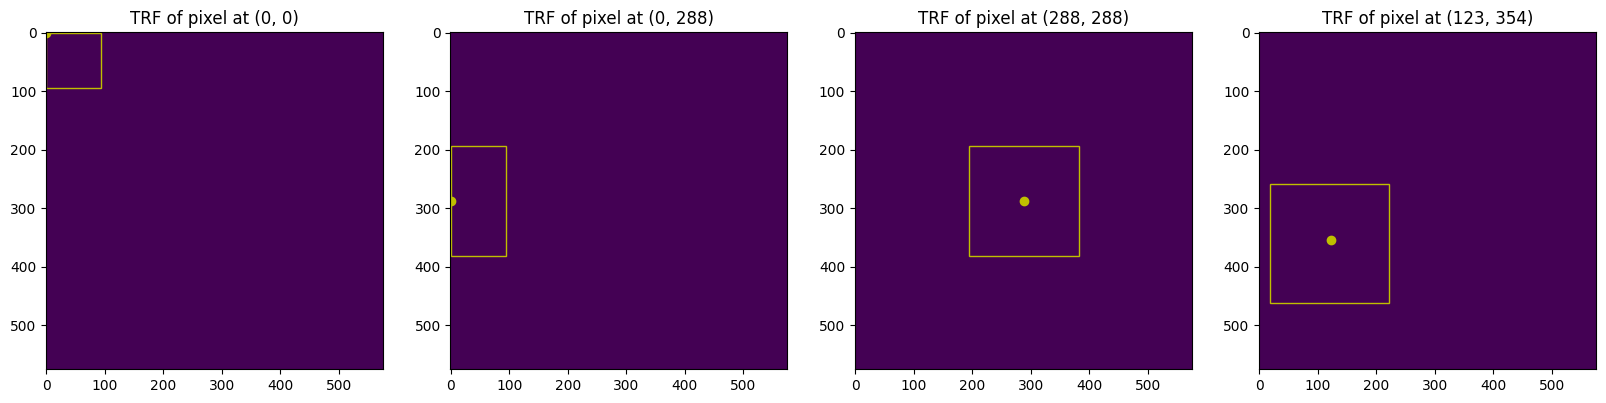

In [10]:
topleft_trf = model.pixel_trf(0, 0), (0,0)
topcenter_trf = model.pixel_trf(0, 576//2), (0, 576//2)
center_trf = model.pixel_trf(576//2, 576//2), (576//2, 576//2)
other_trf = model.pixel_trf(123, 354), (123, 354)

# 1x4 subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, (trf, pos) in enumerate([topleft_trf, topcenter_trf, center_trf, other_trf]):
    axs[i].imshow(np.zeros((576, 576)))
    axs[i].plot(pos[0], pos[1], 'yo')
    axs[i].set_title(f"TRF of pixel at {pos}")
    start = trf[0, 0], trf[0, 1]
    len_x = trf[1, 0] - trf[0, 0] + 1
    len_y = trf[1, 1] - trf[0, 1] + 1
    patch = patches.Rectangle(start, len_x, len_y, linewidth=1, edgecolor='y', facecolor='none')
    axs[i].add_patch(patch)

plt.show()